<a href="https://colab.research.google.com/github/disha2sinha/Movie-Recommendation-System/blob/master/Popularity_Based_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES:**

In [16]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [17]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#https://drive.google.com/file/d/1HcaON_5Qz-bfqlRyDgVWfdS4bD0hQ0Z3/view?usp=sharing

In [18]:
id='17YchkBH43sA_JyKYju74syUjcUnBQuJO'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('MoviesData.csv')  
movies_data = pd.read_csv('MoviesData.csv',engine='python',index_col=0)
movies_data.head()

,title,release_year,release_day,genres,original_language,runtime,content,production_companies,budget,revenue,profit,production_countries,status,popularity,vote_average,vote_count,movieId,keywords,cast,director,rating_count,mean_rating
0,Lilo & Stitch,2002,Friday,Animation|Family,English,85.0,A lonely Hawaiian girl named Lilo is being rai...,Walt Disney Pictures|Walt Disney Feature Anima...,80000000,145771527.0,65771527.0,United States of America,Released,18.469238,7.1,1371.0,5444,"['sister sister relationship', 'extraterrestri...",Chris Sanders|Daveigh Chase|Tia Carrere|David ...,Dean DeBlois,341.0,4.054252
1,The Emerald Forest,1985,Wednesday,Action|Adventure|Drama,English,114.0,"For ten years, engineer Bill Markham has searc...",Embassy Pictures Corporation|Christel Films,8000000,24467000.0,16467000.0,United Kingdom,Released,19.520733,7.0,64.0,2370,"['father son relationship', 'brazil', 'amazon'...",Powers Boothe|Charley Boorman|Meg Foster|Yara ...,John Boorman,324.0,4.256173
2,Jason Bourne,2016,Wednesday,Action|Thriller,English,123.0,The most dangerous former operative of the CIA...,The Kennedy/Marshall Company|Captivate Enterta...,120000000,415484914.0,295484914.0,United Kingdom|United States of America|China,Released,19.133256,5.9,2386.0,160438,"['assassin', 'amnesia', 'flashback']",Matt Damon|Alicia Vikander|Tommy Lee Jones|Vin...,Paul Greengrass,311.0,4.487138
3,Lara Croft: Tomb Raider,2001,Monday,Adventure|Fantasy|Action|Thriller,English,100.0,English aristocrat Lara Croft is skilled in ha...,Paramount Pictures|Toho-Towa|Mutual Film Compa...,115000000,274703340.0,159703340.0,United States of America,Released,15.851722,5.7,2235.0,4367,"['treasure', 'buddhist monk', 'planetary confi...",Angelina Jolie|Jon Voight|Iain Glen|Noah Taylo...,Simon West,304.0,4.138158
4,Top Gun,1986,Friday,Action|Romance|War,English,110.0,For Lieutenant Pete 'Maverick' Mitchell and hi...,Paramount Pictures,15000000,356830601.0,341830601.0,United States of America,Released,20.301019,6.7,1736.0,1101,"['lovesickness', 'loss of lover', 'fighter pil...",Tom Cruise|Kelly McGillis|Val Kilmer|Anthony E...,Tony Scott,291.0,4.221649


In [19]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46904 entries, 0 to 46903
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 46904 non-null  object 
 1   release_year          46904 non-null  object 
 2   release_day           46904 non-null  object 
 3   genres                44380 non-null  object 
 4   original_language     46774 non-null  object 
 5   runtime               46904 non-null  float64
 6   content               45918 non-null  object 
 7   production_companies  34566 non-null  object 
 8   budget                46904 non-null  int64  
 9   revenue               46904 non-null  float64
 10  profit                46904 non-null  float64
 11  production_countries  40388 non-null  object 
 12  status                46904 non-null  object 
 13  popularity            46904 non-null  float64
 14  vote_average          46904 non-null  float64
 15  vote_count         

# **POPULARITY BASED RECOMMENDATION SYSTEM :**

In [20]:
movies_data[['vote_count','vote_average','rating_count','mean_rating','popularity']].describe()

,vote_count,vote_average,rating_count,mean_rating,popularity
count,46904.000000,46904.000000,46904.000000,46904.000000,46904.000000
mean,107.759232,5.611609,1.890052,0.455537,2.894728
std,485.002581,1.932131,11.258909,1.181715,5.939121
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,0.000000,0.000000,0.383559
50%,10.000000,6.000000,0.000000,0.000000,1.115852
75%,34.000000,6.800000,0.000000,0.000000,3.614261
max,14075.000000,10.000000,341.000000,5.000000,547.488298


**WEIGHTED AVERAGE FOR EACH MOVIES AVERAGE RATINGS :**

Weighted Ratings: 
>              W =   Rv + Cm
>                   ---------
                     v+m

R= average rating for the movie as a number from 0 to 10

v= number of votes for the movie

m= minimum votes required to be listed in Top(here 2000)

C=the mean vote across whole report


In [21]:
R=movies_data['vote_average']
v=movies_data['vote_count']
C=movies_data['vote_average'].mean()
m=2000

In [22]:
movies_data['weighted_votes']=(R*v+C*m)/(v+m)
movies_data[['title','weighted_votes']].sort_values('weighted_votes',ascending=False).head(20)

,title,weighted_votes
54,The Shawshank Redemption,7.942288
1748,The Dark Knight,7.923184
2400,Fight Club,7.839580
2219,Pulp Fiction,7.796084
2879,Inception,7.790402
33189,The Godfather,7.780062
1691,Interstellar,7.722599
98,Forrest Gump,7.689821
2880,The Lord of the Rings: The Return of the King,7.613321
1030,The Lord of the Rings: The Fellowship of the Ring,7.561441


In [23]:
R1=movies_data['mean_rating']
v1=movies_data['rating_count']
C1=movies_data['mean_rating'].mean()
m1=movies_data['rating_count'].quantile(0.95)
m1

7.0

In [24]:
movies_data['weighted_ratings']=(R1*v1+C1*m1)/(v1+m1)
movies_data[['title','weighted_ratings']].sort_values('weighted_ratings',ascending=False).head(20)

,title,weighted_ratings
2,Jason Bourne,4.398392
27,Anaconda,4.351153
23,Maze Runner: The Scorch Trials,4.238888
8,Taken,4.195971
66,Awakenings,4.191470
1,The Emerald Forest,4.175797
13,Tremors,4.141510
4,Top Gun,4.133184
10,Eyes Wide Shut,4.123190
14,Love Happens,4.119774


**ASSIGNING SCORES TO THE MOVIES BY GIVING 45% IMPORTANCE TO WEIGHTED AVERAGE OF VOTES + 45% IMPORTANCE TO POPULARITY + 10% TO WEIGHTED AVERAGE OF RATINGS**

In [25]:
scaler=MinMaxScaler()
movies_data[['weighted_votes','weighted_ratings','popularity']]=scaler.fit_transform(movies_data[['weighted_votes','weighted_ratings','popularity']])
movies_data['score']=movies_data['weighted_votes']*0.45 + movies_data['weighted_ratings']*0.1+movies_data['popularity']*0.45
movies_data[['title','weighted_votes','weighted_ratings','popularity','score']].sort_values('score',ascending=False).head(10)

,title,weighted_votes,weighted_ratings,popularity,score
11152,Minions,0.404144,0.000000,1.000000,0.631865
7,Wonder Woman,0.599379,0.842731,0.537613,0.595920
2219,Pulp Fiction,0.950965,0.470990,0.257449,0.590885
1748,The Dark Knight,0.993593,0.288695,0.224968,0.577222
54,The Shawshank Redemption,1.000000,0.761820,0.094332,0.568631
1587,Big Hero 6,0.775186,0.318018,0.390602,0.556406
367,Deadpool,0.728893,0.634018,0.343132,0.545813
137,Guardians of the Galaxy Vol. 2,0.690717,0.814849,0.338511,0.544638
122,Beauty and the Beast,0.511027,0.701374,0.524675,0.536204
1140,Gone Girl,0.794492,0.506206,0.282748,0.535379


**ONLY MOVIES HAVING SCORE ABOVE A THRESHOLD VALUE CONSIDERED POPULAR :**

In [26]:
movies_data.score.describe()

count    46904.000000
mean         0.109260
std          0.030854
min          0.043362
25%          0.098521
50%          0.099412
75%          0.103262
max          0.631865
Name: score, dtype: float64

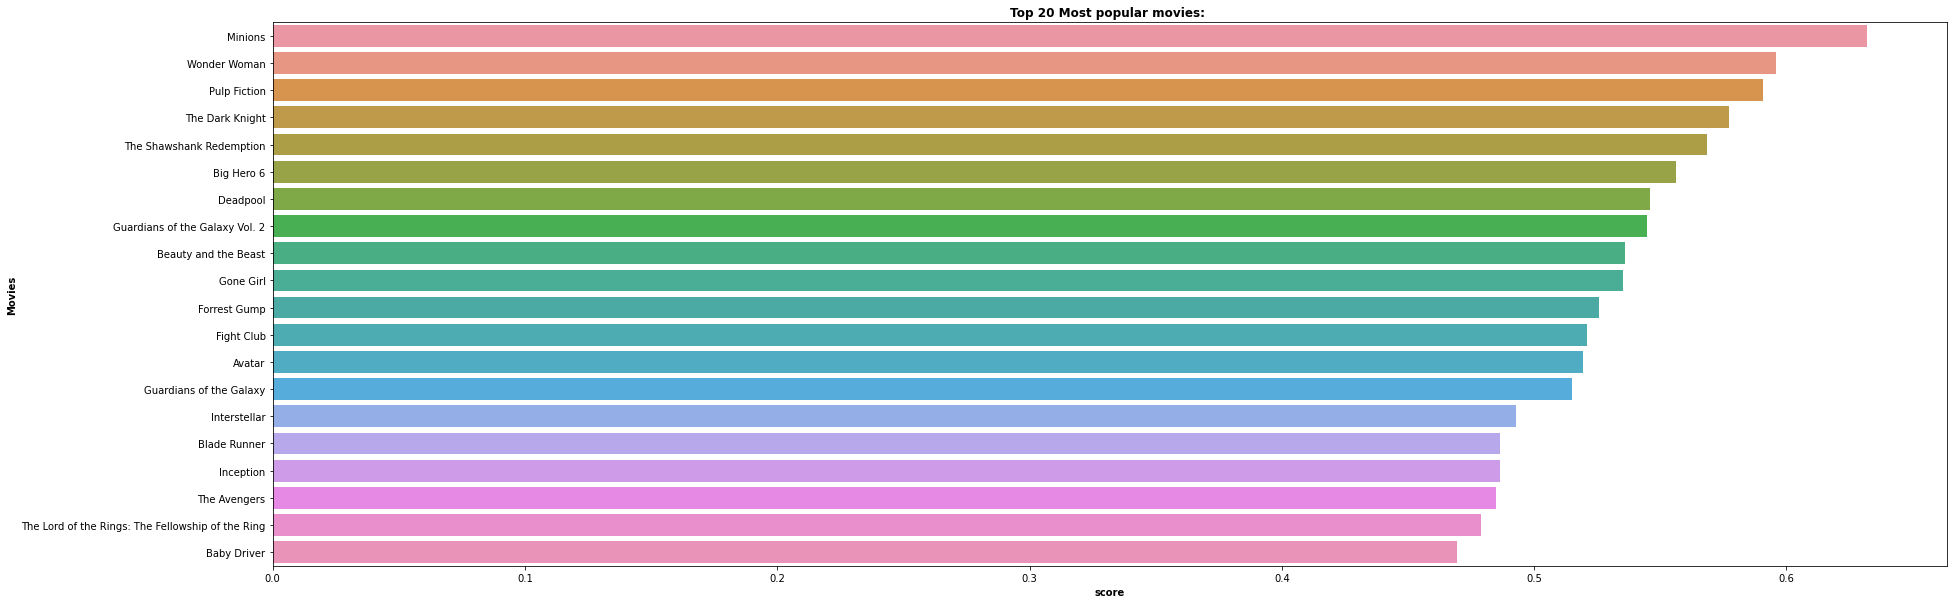

In [27]:
popular_movies=movies_data[['movieId','title','budget','profit','score','release_year','release_day','genres','production_countries','production_companies','original_language','runtime','content','status','cast','director']].sort_values('score',ascending=False).reset_index(drop=True)
plt.figure(figsize=(30,10))
axis=sns.barplot(x=popular_movies['score'].head(20),y=popular_movies['title'].head(20))
plt.title('Top 20 Most popular movies: ',weight='bold')
plt.xlabel('score',weight='bold')
plt.ylabel('Movies',weight='bold')
plt.savefig('PopularMovies.jpg')

In [28]:
popular_movies.shape

(46904, 16)

In [29]:
popular_movies[['title','genres','score']].head(20)

,title,genres,score
0,Minions,Family|Animation|Adventure|Comedy,0.631865
1,Wonder Woman,Action|Adventure|Fantasy,0.595920
2,Pulp Fiction,Thriller|Crime,0.590885
3,The Dark Knight,Drama|Action|Crime|Thriller,0.577222
4,The Shawshank Redemption,Drama|Crime,0.568631
5,Big Hero 6,Adventure|Family|Animation|Action|Comedy,0.556406
6,Deadpool,Action|Adventure|Comedy,0.545813
7,Guardians of the Galaxy Vol. 2,Action|Adventure|Comedy|Science Fiction,0.544638
8,Beauty and the Beast,Family|Fantasy|Romance,0.536204
9,Gone Girl,Mystery|Thriller|Drama,0.535379


In [31]:
popular_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46904 entries, 0 to 46903
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movieId               46904 non-null  int64  
 1   title                 46904 non-null  object 
 2   budget                46904 non-null  int64  
 3   profit                46904 non-null  float64
 4   score                 46904 non-null  float64
 5   release_year          46904 non-null  object 
 6   release_day           46904 non-null  object 
 7   genres                44380 non-null  object 
 8   production_countries  40388 non-null  object 
 9   production_companies  34566 non-null  object 
 10  original_language     46774 non-null  object 
 11  runtime               46904 non-null  float64
 12  content               45918 non-null  object 
 13  status                46904 non-null  object 
 14  cast                  44405 non-null  object 
 15  director           

In [30]:
#popular_movies.to_csv('PopularMovies.csv')
#file = drive.CreateFile({'parents':[{u'id': '1LxtvFIt9kDw8caxwrYh26MfK2ZcCiJaf'}]}) 
#file.SetContentFile("PopularMovies.csv")
#file.Upload()